<a href="https://colab.research.google.com/github/micah-shull/superstore/blob/main/000_superstore_dataprep_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Prep Script Summary and Importance**

The script is a comprehensive data preprocessing and preparation utility designed for analyzing the **Superstore dataset**. It includes functions for cleaning data, deriving key metrics, transforming columns, and aggregating metrics to enable streamlined and efficient analysis. This ensures the dataset is in a structured, standardized, and insightful format for further exploratory data analysis (EDA), visualization, or modeling.

---

#### **What the Script Does**
1. **Preprocessing the Data**:
   - Ensures proper formatting of columns (e.g., converting date columns to `datetime` type).
   - Derives essential business metrics like:
     - **Profit Margin**: Measures profitability relative to sales.
     - **Estimated Cost**: Provides a calculated approximation of costs.
     - **Regional Market Share**: Highlights the percentage of sales contributed by each region.
   - Aggregates customer-level metrics (e.g., total sales, total profit, order count).

2. **Adding Time-Based Columns**:
   - Extracts time-related features (e.g., year, quarter, month, day, weekday) from order and ship dates.
   - Allows for temporal analysis and trend detection (e.g., sales trends by month or profitability by year).

3. **Converting Columns to Categorical and Visualizing**:
   - Identifies columns with fewer unique values and converts them to `category` type, reducing memory usage and improving computational efficiency.
   - Visualizes the distribution of unique values, aiding in understanding categorical data.

4. **Removing Duplicate Rows**:
   - Eliminates redundant rows to ensure the dataset is clean and contains unique records.
   - Allows for deduplication based on specific columns or the entire dataset.

5. **Standardizing Categorical Data**:
   - Ensures consistency in categorical column values by converting them to title case.
   - Prepares data for consistent grouping and visualization.

6. **Calculating Aggregate Metrics**:
   - Dynamically groups data by specified columns and computes:
     - Total sales, profit, and estimated cost.
     - Mean profit margin, profitability ratio, and discounts.
     - Sum of order count and quantity.
   - Provides a concise summary of key metrics for business insights.

---

#### **Why These Steps Are Important**

1. **Ensures Data Consistency**:
   - Proper formatting of dates and categorical columns eliminates potential errors during analysis and visualization.

2. **Derives Business Insights**:
   - Calculated metrics like **Profit Margin**, **Estimated Cost**, and **Regional Market Share** are essential for understanding financial performance and regional trends.

3. **Improves Data Efficiency**:
   - Converting appropriate columns to `category` reduces memory usage and speeds up operations like group-bys and filtering.

4. **Facilitates Trend Analysis**:
   - Adding time-based features enables seasonal and temporal trend detection, critical for decision-making.

5. **Removes Redundancy**:
   - Duplicate removal ensures the dataset is accurate and does not skew analysis.

6. **Standardizes Data for Grouping**:
   - Consistent formatting of categorical data ensures reliable grouping and comparison across categories.

7. **Streamlines Metric Calculation**:
   - Aggregate metrics simplify the process of generating actionable insights for business reporting and analysis.

---

#### **How It Supports Data Analysis**
- **Exploratory Analysis**:
  - The cleaned and transformed dataset is ready for visualizations and descriptive statistics.
- **Performance Monitoring**:
  - Metrics like profit margin and regional market share enable performance evaluation at multiple levels (e.g., region, category, customer).
- **Decision Support**:
  - Insights from aggregated data can guide strategic decisions (e.g., identifying profitable segments or regions).
- **Trend Detection**:
  - Time-based features allow businesses to understand seasonal sales patterns and plan accordingly.

---

#### **Summary**
The script lays the foundation for analyzing the Superstore dataset by addressing common data cleaning challenges, deriving essential metrics, and preparing the data for deeper exploration. These steps ensure the dataset is insightful, reliable, and ready for use in business intelligence applications or advanced analytics workflows.

### Load Raw Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/sample-superstore.xls'
data = pd.read_excel(file_path)

print("Dataset loaded successfully!")
print("Missing Data: ", data.isnull().sum().sum())
# Display general info about the dataset
print("\nDataset Information:")
data.info()

Dataset loaded successfully!
Missing Data:  0

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Cate



## **Derived Metrics: Enhancing Insights**
To maximize the analytical potential of our dataset,I created a series of derived metrics. These metrics provide deeper insights into profitability, customer behavior, and regional performance. Below is a summary of the derived metrics:

#### **1. Profit Margin**
   - **Formula**: \((\text{Profit} / \text{Sales}) \times 100\)
   - **Purpose**: Measures profitability as a percentage of sales, helping us identify high-margin products, categories, and regions.

#### **2. Estimated Cost**
   - **Formula**: \(\text{Sales} - \text{Profit}\)
   - **Purpose**: Provides an approximation of the cost associated with each sale, enabling cost analysis and benchmarking.

#### **3. Profitability Ratio**
   - **Formula**: \((\text{Profit} / \text{Estimated Cost}) \times 100\)
   - **Purpose**: Highlights profitability relative to costs, offering insights into financial efficiency for products, regions, and customer segments.

#### **4. Regional Market Share**
   - **Formula**: \((\text{Regional Sales} / \text{Total Sales}) \times 100\)
   - **Purpose**: Measures the percentage contribution of each region to overall sales, helping to identify key markets and regions for growth.

#### **5. Customer Metrics**
   - **Components**:
     - **Total Sales**: Aggregated sales for each customer.
     - **Total Profit**: Aggregated profit for each customer.
     - **Order Count**: Total number of orders per customer.
   - **Purpose**: Aggregates customer-level data to analyze customer lifetime value, profitability, and purchasing patterns.

#### **6. Average Order Value (AOV)**
   - **Formula**: \(\text{Total Sales} / \text{Order Count}\)
   - **Purpose**: Calculates the average revenue per order, offering insights into customer purchasing behavior and sales strategies.

#### **7. Discount**
   - **Formula**: \(\text{Mean Discount Rate}\)
   - **Purpose**: Evaluates the impact of discounts on sales, profitability, and customer behavior.

#### **8. Quantity**
   - **Formula**: Total quantity of items sold.
   - **Purpose**: Tracks product volume sold across categories, customers, and regions, offering insights into demand patterns.

#### **9. Aggregated Metrics**
   - Includes:
     - **Total Sales**
     - **Total Profit**
     - **Total Estimated Cost**
     - **Total Discount**
     - **Total Quantity**
   - **Purpose**: Provides a consolidated view of key metrics across groupings such as region, category, or customer.

---

### **Why Derived Metrics Matter**
These metrics transform raw data into actionable insights, enabling a deeper understanding of the business. For example:
- **Profit Margin** and **Profitability Ratio** reveal financial efficiency and identify high-performing segments.
- **Customer Metrics** and **AOV** highlight customer purchasing patterns and value.
- **Regional Market Share** focuses attention on key markets for strategic decisions.
- **Aggregated Metrics** provide high-level summaries that support comprehensive reporting.

By deriving these metrics, we enhance our ability to make data-driven decisions, optimize operations, and uncover hidden opportunities within the dataset.

In [ ]:
# Ensure the order and ship date columns are in datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Derived Metrics
# 1. Profit Margin
data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

# 2. Estimated Cost
data['Estimated Cost'] = data['Sales'] - data['Profit']

# 3. Profitability Ratio
data['Profitability Ratio'] = (data['Profit'] / data['Estimated Cost']) * 100

# 4. Regional Market Share
region_sales = data.groupby('Region')['Sales'].sum()
total_sales = data['Sales'].sum()
data['Regional Market Share (%)'] = data['Region'].map(region_sales / total_sales * 100)

# 5. Customer Metrics: Total Sales, Profit, and Order Count
customer_metrics = data.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'nunique'  # Number of unique orders
}).rename(columns={'Order ID': 'Order Count'})

# Merge customer metrics back to the main dataset
data = data.merge(customer_metrics, on='Customer ID', suffixes=('', '_Customer'))

# 6. Average Order Value (AOV)
data['AOV'] = data['Sales_Customer'] / data['Order Count']

# 7. Discount
data['Average Discount'] = data['Discount']  # Already stored per row; can be aggregated later if needed.

# 8. Quantity
data['Total Quantity'] = data['Quantity']  # Ready for summation during aggregation.

# 9. Aggregated Metrics (Dynamic Grouping Available Later)
# Metrics like Total Sales, Total Profit, Total Estimated Cost, etc., will be computed dynamically
# using the `calculate_aggregate_metrics` function as needed.

# Final check: Print dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Row ID                     9994 non-null   int64         
 1   Order ID                   9994 non-null   object        
 2   Order Date                 9994 non-null   datetime64[ns]
 3   Ship Date                  9994 non-null   datetime64[ns]
 4   Ship Mode                  9994 non-null   object        
 5   Customer ID                9994 non-null   object        
 6   Customer Name              9994 non-null   object        
 7   Segment                    9994 non-null   object        
 8   Country                    9994 non-null   object        
 9   City                       9994 non-null   object        
 10  State                      9994 non-null   object        
 11  Postal Code                9994 non-null   int64         
 12  Region

### **Converting Columns to Categorical Data**
To optimize the dataset and prepare it for efficient handling and visualization, I identified columns with a limited number of unique values and converted them to the `category` data type. This process reduces memory usage and enhances performance, especially during grouping, filtering, or aggregation operations on categorical data.

---

### **Steps:**
1. **Count Unique Values**:
   - The number of unique values in each column was calculated using `.nunique()`.

2. **Set Threshold**:
   - Columns with fewer than 25 unique values were identified as suitable for conversion. This threshold ensures that only genuinely categorical columns (e.g., `Region`, `Segment`) are converted.

3. **Exclude Certain Columns**:
   - Some columns were excluded from conversion, such as derived metrics and numeric fields (`Quantity`, `Order Count`, etc.), which are better suited for numeric operations.

4. **Conversion**:
   - Identified columns were converted to the `category` data type using `.astype('category')`.

5. **Standardization**:
   - To ensure consistency, all values in the newly converted categorical columns were standardized (e.g., converted to title case where applicable).

---

### **Benefits of This Step**
- **Reduced Memory Usage**:
   - Converting columns to `category` significantly reduces the memory footprint of the dataset, especially for columns with repetitive values (e.g., `Region`, `Segment`).

- **Improved Performance**:
   - Operations such as grouping, filtering, and aggregation become faster when working with categorical columns.

- **Enhanced Compatibility**:
   - Standardized categorical data ensures compatibility with visualization libraries like Matplotlib and Seaborn, producing cleaner plots.



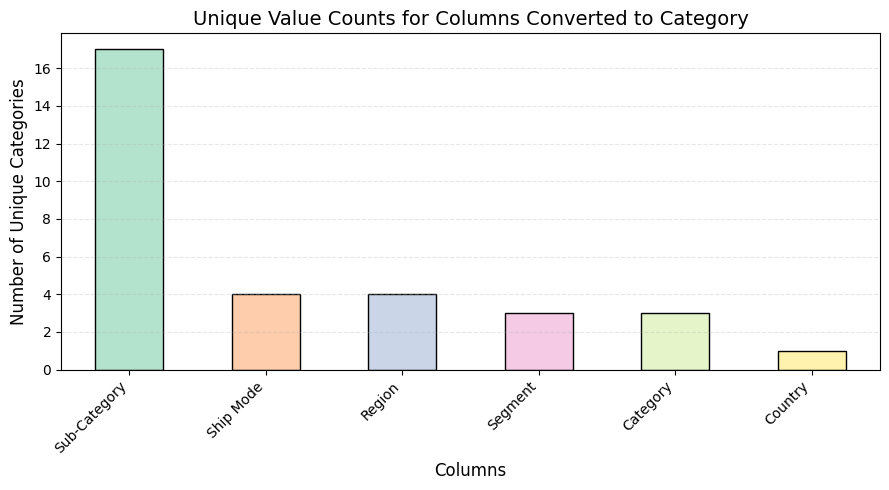

In [ ]:
# Define columns to exclude from conversion
exclude_columns = ['Discount', 'Average Discount', 'Profit Margin', 'Regional Market Share (%)', 'Quantity', 'Total Quantity', 'Order Count', 'Estimated Cost']

# Count unique values for each column
unique_counts = data.nunique()

# Identify columns to convert based on the threshold
threshold = 25
columns_to_convert = [
    col for col in unique_counts[unique_counts < threshold].index
    if col not in exclude_columns
]

# Convert identified columns to 'category' data type
for column in columns_to_convert:
    data[column] = data[column].astype('category')

# Optional: Standardize categorical values to ensure consistent formatting
categorical_columns = data.select_dtypes(include='category').columns
for column in categorical_columns:
    data[column] = data[column].astype(str).str.title().astype('category')

# Visualization (optional)
palette = sns.color_palette("Pastel2", len(columns_to_convert))
plt.figure(figsize=(9, 5))
unique_counts[columns_to_convert].sort_values(ascending=False).plot(
    kind='bar',
    color=palette,
    edgecolor='black'
)
plt.title('Unique Value Counts for Columns Converted to Category', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Unique Categories', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
data.select_dtypes(include='category').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Ship Mode     9994 non-null   category
 1   Segment       9994 non-null   category
 2   Country       9994 non-null   category
 3   Region        9994 non-null   category
 4   Category      9994 non-null   category
 5   Sub-Category  9994 non-null   category
dtypes: category(6)
memory usage: 60.1 KB


Here’s the updated section for **Extracting and Converting Time-Based Features**, reflecting the new implementation:

---

### **Extract and Convert Time-Based Features**
Extracting time-based features like year, quarter, month, day, and weekday from the order and ship dates adds valuable dimensions for analysis. These features enable temporal trend analysis, seasonal insights, and operational efficiency evaluations.

---

### **Steps:**

1. **Datetime Conversion**:
   - Ensures that `Order Date` and `Ship Date` columns are in the correct datetime format using `pd.to_datetime()`.

2. **Extract Features**:
   - **Year**: Extracts the year of the order.
   - **Quarter**: Extracts the quarter of the year (1–4).
   - **Month**: Extracts the numeric month (e.g., January = 1).
   - **Day**: Extracts the day of the month.
   - **Weekday**: Extracts the name of the weekday (e.g., Monday, Tuesday).

3. **Convert to Categorical**:
   - Converts the extracted features to the `category` data type for efficient storage and faster operations.

4. **Verification**:
   - Prints the data types of the new columns to confirm successful extraction and conversion.

---

### **Explanation of Features**
1. **Order Year** and **Ship Year**:
   - Useful for detecting yearly sales or shipping trends.

2. **Order Quarter** and **Ship Quarter**:
   - Highlights seasonal patterns (e.g., Q4 holiday sales).

3. **Order Month** and **Ship Month**:
   - Reveals monthly variations in order volume or shipping times.

4. **Order Day** and **Ship Day**:
   - Analyzes daily patterns or operational efficiency.

5. **Order Weekday** and **Ship Weekday**:
   - Provides insights into weekly trends, such as peak order or shipping days.

---

### **Benefits of This Step**
- **Temporal Analysis**:
   - Enables analysis of trends over years, quarters, months, and weeks.
   - Identifies seasonal patterns in sales, shipping, or profitability.

- **Operational Insights**:
   - Tracks operational efficiency by comparing order and shipping times across time dimensions.

- **Visualization-Ready**:
   - Extracted features are stored as categorical data, making them lightweight and ready for visualization with libraries like Matplotlib or Seaborn.




In [ ]:
# Ensure the order and ship date columns are in datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Extract time-based features
data['Order Year'] = data['Order Date'].dt.year
data['Order Quarter'] = data['Order Date'].dt.quarter
data['Order Month'] = data['Order Date'].dt.month
data['Order Day'] = data['Order Date'].dt.day
data['Order Weekday'] = data['Order Date'].dt.day_name()

data['Ship Year'] = data['Ship Date'].dt.year
data['Ship Quarter'] = data['Ship Date'].dt.quarter
data['Ship Month'] = data['Ship Date'].dt.month
data['Ship Day'] = data['Ship Date'].dt.day
data['Ship Weekday'] = data['Ship Date'].dt.day_name()

# Convert extracted features to categorical
time_columns = [
    'Order Year', 'Order Quarter', 'Order Month', 'Order Day', 'Order Weekday',
    'Ship Year', 'Ship Quarter', 'Ship Month', 'Ship Day', 'Ship Weekday'
]

for column in time_columns:
    data[column] = data[column].astype('category')

# Verification: Print data types of the new columns
print(data[time_columns].dtypes)

Order Year       category
Order Quarter    category
Order Month      category
Order Day        category
Order Weekday    category
Ship Year        category
Ship Quarter     category
Ship Month       category
Ship Day         category
Ship Weekday     category
dtype: object




### **Convert Categories to Title Case**
To ensure consistent formatting across categorical data, all values in categorical columns are converted to title case. This step standardizes labels for cleaner analysis and visualization, making the dataset more professional and easier to interpret.

---

### **Steps:**

1. **Select Categorical Columns**:
   - Dynamically identifies all columns with the `category` data type using:
     ```python
     data.select_dtypes(include='category').columns
     ```

2. **Apply Title Case**:
   - Iterates through each categorical column, converting values to strings, applying `.str.title()` to capitalize each word, and converting them back to the `category` data type.

3. **Verification**:
   - Prints the unique values in each categorical column to confirm consistent formatting.

---

### **Key Features**
1. **Dynamic Selection**:
   - Automatically detects all columns with the `category` data type, ensuring that the conversion applies to both existing and newly created categorical columns.

2. **Safe Conversion**:
   - By using `.astype(str)` and `.astype('category')`, the conversion safely handles non-string data and maintains the `category` type.

3. **Consistent Formatting**:
   - Applies title case across all text values in categorical columns, ensuring clean and professional labels (e.g., "home office" becomes "Home Office").

---

### **Benefits of This Step**
- **Improved Readability**:
   - Ensures uniform formatting, making labels intuitive and visually appealing in reports and dashboards.

- **Professional Output**:
   - Clean, standardized labels convey a polished and consistent look in visualizations and summaries.

- **Scalability**:
   - Dynamically applies to all current and future categorical columns, reducing the need for manual intervention.



In [ ]:
# Select all categorical columns
categorical_columns = data.select_dtypes(include='category').columns

# Convert values in each categorical column to title case
for column in categorical_columns:
    data[column] = data[column].astype(str).str.title().astype('category')

# Verification: Print unique values in each categorical column
for column in categorical_columns:
    print(f"Unique values in '{column}':")
    print(data[column].unique())
    print()


Unique values in 'Ship Mode':
['Second Class', 'Standard Class', 'First Class', 'Same Day']
Categories (4, object): ['First Class', 'Same Day', 'Second Class', 'Standard Class']

Unique values in 'Segment':
['Consumer', 'Corporate', 'Home Office']
Categories (3, object): ['Consumer', 'Corporate', 'Home Office']

Unique values in 'Country':
['United States']
Categories (1, object): ['United States']

Unique values in 'Region':
['South', 'West', 'Central', 'East']
Categories (4, object): ['Central', 'East', 'South', 'West']

Unique values in 'Category':
['Furniture', 'Office Supplies', 'Technology']
Categories (3, object): ['Furniture', 'Office Supplies', 'Technology']

Unique values in 'Sub-Category':
['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage', ..., 'Envelopes', 'Fasteners', 'Supplies', 'Machines', 'Copiers']
Length: 17
Categories (17, object): ['Accessories', 'Appliances', 'Art', 'Binders', ..., 'Phones', 'Storage',
                          'Supplies', 'Tables']

Unique val

### Data Utils Script

In [ ]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(data):
    """
    Prepares and preprocesses the Superstore dataset by cleaning, deriving core metrics,
    and converting appropriate columns to categorical types.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Derived Metrics
    # 1. Profit Margin
    data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

    # 2. Estimated Cost
    data['Estimated Cost'] = data['Sales'] - data['Profit']

    # 3. Customer Metrics: Total Sales, Profit, and Order Count
    customer_metrics = data.groupby('Customer ID').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Order ID': 'nunique'  # Number of orders
    }).rename(columns={'Order ID': 'Order Count'})

    # 4. Regional Market Share
    region_sales = data.groupby('Region')['Sales'].sum()
    total_sales = data['Sales'].sum()
    regional_market_share = (region_sales / total_sales) * 100

    # Merge customer metrics back to the main dataset
    data = data.merge(customer_metrics, on='Customer ID', suffixes=('', '_Customer'))
    data['Regional Market Share (%)'] = data['Region'].map(regional_market_share)

    # Convert relevant columns to categorical
    categorical_columns = ['Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode']
    for column in categorical_columns:
        data[column] = data[column].astype('category')

    return data


def convert_to_category_and_visualize(data, threshold=25, exclude_columns=None):
    """
    Converts columns with fewer than 'threshold' unique values to 'category' dtype,
    excluding specified columns, and visualizes the unique value counts.
    """
    if exclude_columns is None:
        exclude_columns = []

    # Count unique values for each column
    unique_counts = data.nunique()

    # Identify columns to convert, excluding specified columns
    columns_to_convert = [
        col for col in unique_counts[unique_counts < threshold].index
        if col not in exclude_columns
    ]

    # Convert selected columns to 'category' dtype
    for column in columns_to_convert:
        data[column] = data[column].astype('category')

    # Filter for columns with fewer than threshold unique values for visualization
    filtered_counts = unique_counts[
        (unique_counts < threshold) & (~unique_counts.index.isin(exclude_columns))
    ]

    # Visualize unique value counts
    palette = sns.color_palette("Pastel2", len(filtered_counts))
    plt.figure(figsize=(9, 5))
    filtered_counts.sort_values(ascending=False).plot(
        kind='bar',
        color=palette,
        edgecolor='black'
    )
    plt.title('Unique Value Counts for Columns Converted to Category', fontsize=14)
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Number of Unique Categories', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Verify the conversions
    # print("\nColumns converted to 'category' dtype:")
    # for column in columns_to_convert:
    #     print(f"{column}: {data[column].dtype}")

    return data

def add_time_based_columns(data):
    """
    Adds time-based columns derived from Order Date and Ship Date to the dataset,
    and converts these columns to categorical type for analysis and visualization.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Create new time-based columns
    data['Order Year'] = data['Order Date'].dt.year
    data['Order Quarter'] = data['Order Date'].dt.quarter
    data['Order Month'] = data['Order Date'].dt.month
    data['Order Day'] = data['Order Date'].dt.day
    data['Order Weekday'] = data['Order Date'].dt.day_name()  # e.g., 'Monday', 'Tuesday'

    data['Ship Month'] = data['Ship Date'].dt.month
    data['Ship Day'] = data['Ship Date'].dt.day
    data['Ship Weekday'] = data['Ship Date'].dt.day_name()

    # Convert the new columns to categorical
    time_columns = ['Order Year', 'Order Month', 'Order Month', 'Order Day', 'Order Weekday', 'Ship Month', 'Ship Day', 'Ship Weekday']
    for column in time_columns:
        data[column] = data[column].astype('category')

    return data

def standardize_categorical_columns(data, columns=None):
    """
    Standardizes categorical columns by converting their values to title case.
    If `columns` is None, all categorical columns are standardized.
    """
    if columns is None:
        columns = data.select_dtypes(include='category').columns

    for column in columns:
        if column in data.columns:
            data[column] = data[column].astype(str).str.title().astype('category')
    return data


def remove_duplicates(data, subset=None):
    """
    Removes duplicate rows from the dataset and reports the number of rows removed.

    Parameters:
    - data: DataFrame
        The dataset to remove duplicates from.
    - subset: list or None, optional
        Columns to consider for identifying duplicates. If None, all columns are used.

    Returns:
    - DataFrame: A new DataFrame with duplicates removed.
    """
    initial_shape = data.shape
    # Drop duplicates using the provided subset or across all columns if subset is None
    data = data.loc[~data.duplicated(subset=subset)].copy()
    removed_rows = initial_shape[0] - data.shape[0]
    print(f"Removed {removed_rows} duplicate rows.")
    return data


def calculate_aggregate_metrics(data, group_by_columns):
    """
    Dynamically calculates aggregate metrics for specified groupings.

    Parameters:
    - data: DataFrame
        The dataset to calculate metrics from.
    - group_by_columns: list
        The columns to group the data by.

    Returns:
    - DataFrame: A new DataFrame with the aggregated metrics.
    """
    # Define the aggregation columns and their operations
    aggregation_columns = {
        'Profit': 'sum',
        'Profit Margin': 'mean',
        'Profitability Ratio': 'mean',  # New metric
        'Estimated Cost': 'sum',
        'Sales': 'sum',
        'Discount': 'mean',
        'Order Count': 'sum',
        'Quantity': 'sum',
        'Regional Market Share (%)': 'mean'  # New metric
    }

    # Perform the group-by operation and apply aggregations
    aggregated_data = data.groupby(group_by_columns).agg(**{
        f"Total_{key.replace(' ', '_')}": (key, agg_func)
        for key, agg_func in aggregation_columns.items()
    })

    # Reset index for better readability
    aggregated_data = aggregated_data.reset_index()

    return aggregated_data


'''

with open("data_prep_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_prep_utils.py")

# Import and reload the module to use its functions
import importlib
import data_prep_utils as dpu
importlib.reload(dpu)



Script successfully written to data_prep_utils.py


<module 'data_prep_utils' from '/content/data_prep_utils.py'>

Dataset loaded successfully.


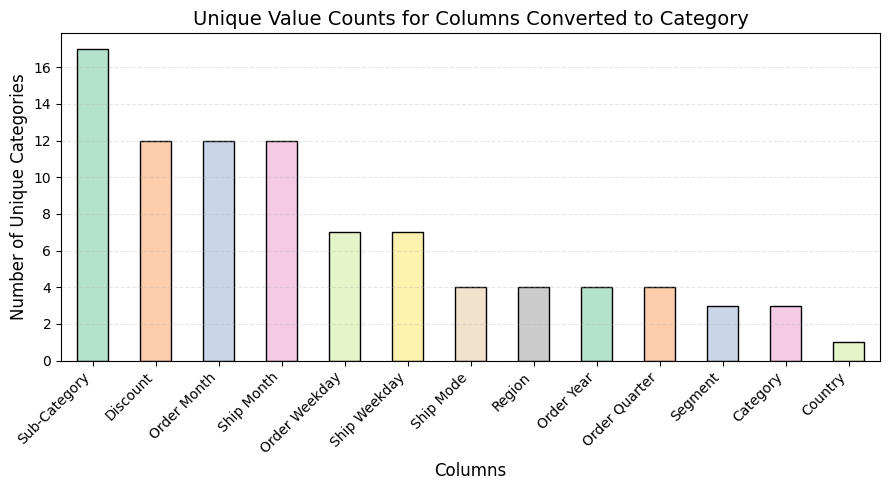

Removed 4985 duplicate rows.
Final dataset structure:
<class 'pandas.core.frame.DataFrame'>
Index: 5009 entries, 0 to 9993
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Row ID                     5009 non-null   int64         
 1   Order ID                   5009 non-null   object        
 2   Order Date                 5009 non-null   datetime64[ns]
 3   Ship Date                  5009 non-null   datetime64[ns]
 4   Ship Mode                  5009 non-null   category      
 5   Customer ID                5009 non-null   object        
 6   Customer Name              5009 non-null   object        
 7   Segment                    5009 non-null   category      
 8   Country                    5009 non-null   category      
 9   City                       5009 non-null   object        
 10  State                      5009 non-null   object        
 11  Postal Code         

In [ ]:
# Import the script
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import data_prep_utils as dpu
importlib.reload(dpu)

# Step 1: Load your dataset
try:
    data = pd.read_excel('sample-superstore.xls')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()

# Step 2: Preprocess the data (derives metrics and standardizes categorical columns)
data = dpu.preprocess_data(data)

# Step 3: Add time-based columns
data = dpu.add_time_based_columns(data)

# Step 4: Convert appropriate columns to category and visualize
exclude_columns = ['Profit per Category', 'Profit per Sub-Category', 'Regional Market Share (%)', 'Quantity', 'Order Count']
data = dpu.convert_to_category_and_visualize(data, threshold=25, exclude_columns=exclude_columns)

# Step 5: Remove duplicates
data = dpu.remove_duplicates(data, subset=['Order ID', 'Customer ID'])

# Step 6: (Optional) Standardize specific columns if needed
columns_to_standardize = ['Region', 'Category', 'Sub-Category']
data = dpu.standardize_categorical_columns(data, columns_to_standardize)

# Final check
print("Final dataset structure:")
print(data.info())



### Strengths of the Data
1. **Complete Dataset**:
   - All 39 columns have the full 9994 non-null entries, indicating no missing data.

2. **Appropriate Data Types**:
   - **Datetime Columns**: `Order Date` and `Ship Date` are properly converted to `datetime64[ns]`, which allows for time-based analyses.
   - **Categorical Columns**: Key categorical features like `Ship Mode`, `Segment`, and `Order Weekday` are in the `category` type, optimizing memory and enabling category-specific operations.
   - **Numeric Columns**: Continuous data such as `Sales`, `Profit`, and derived metrics (`Profitability Ratio`, `AOV`, etc.) remain as `float64`.

3. **Derived Metrics**:
   - Metrics like `Profit Margin`, `Profitability Ratio`, and `Effective Price` provide deeper analytical potential.
   - Aggregated metrics (`Sales_Customer`, `Profit_Customer`) add customer-level insights.

4. **Time-Based Features**:
   - Columns like `Order Month`, `Order Weekday`, and `Ship Weekday` are included, enabling trend analyses by time.



